Chargement des données 

In [1]:
from pyhive import hive
import pandas as pd

In [2]:
# Paramètres de connexion Hive
hive_host = 'localhost'
hive_port = 10000
hive_username = ' ' 
hive_password = ' ' 

try:
    # Établir une connexion avec authentification LDAP
    conn = hive.Connection(
        host=hive_host,
        port=hive_port,
        username=hive_username,
        password=hive_password,
        auth='LDAP'  
    )
    print("Connecté à Hive avec succès")
except Exception as e:
    print(f"Erreur lors de la connexion à Hive: {e}")

Connecté à Hive avec succès


In [3]:
# Créer un curseur
cursor=conn.cursor()

# Exécuter une requête pour récupérer les données de la table "catalogue"
query = "SELECT * FROM catalogue"
cursor.execute(query)
print("done SELECT * FROM catalogue")

# Charger les résultats dans un DataFrame Pandas
dataCatalogue = cursor.fetchall()  
# Récupérer les noms des colonnes
columns = [desc[0] for desc in cursor.description] 
dfCatalogue = pd.DataFrame(dataCatalogue, columns=columns)
print("done dfCatalogue")

done SELECT * FROM catalogue
done dfCatalogue


In [5]:
# Afficher les premières lignes du DataFrame
print(dfCatalogue.head())

  catalogue.id catalogue.marque catalogue.nom  catalogue.puissance  \
0            1            Volvo        S80 T6                  272   
1            2            Volvo        S80 T6                  272   
2            3            Volvo        S80 T6                  272   
3            4            Volvo        S80 T6                  272   
4            5            Volvo        S80 T6                  272   

  catalogue.longueur  catalogue.nbplaces  catalogue.nbportes  \
0        très longue                   5                   5   
1        très longue                   5                   5   
2        très longue                   5                   5   
3        très longue                   5                   5   
4        très longue                   5                   5   

  catalogue.couleur  catalogue.occasion  catalogue.prix  
0             blanc               False           50500  
1              noir               False           50500  
2             rouge 

In [6]:
print("Starting")
# Exécuter une requête pour récupérer les données de la table "immatriculation_ext"
query = "SELECT * FROM immatriculation_ext"
cursor.execute(query)
print("select done")
# Charger les résultats dans un DataFrame Pandas
dataImmatriculation = cursor.fetchall()  
# Récupérer les noms des colonnes
columns = [desc[0] for desc in cursor.description] 
dfImmatriculation = pd.DataFrame(dataImmatriculation, columns=columns)
print("got amll immatriculation")


Starting
select done
got amll immatriculation


In [7]:
print(dfImmatriculation.head())

  immatriculation_ext.immatriculation immatriculation_ext.marque  \
0                          3176 TS 67                    Renault   
1                          3721 QS 49                      Volvo   
2                          9099 UV 26                 Volkswagen   
3                          3563 LA 55                    Peugeot   
4                          6963 AX 34                       Audi   

  immatriculation_ext.nom  immatriculation_ext.puissance  \
0             Laguna 2.0T                            170   
1                  S80 T6                            272   
2            Golf 2.0 FSI                            150   
3                1007 1.4                             75   
4                  A2 1.4                             75   

  immatriculation_ext.longueur  immatriculation_ext.nbplaces  \
0                       longue                             5   
1                  très longue                             5   
2                      moyenne        

In [8]:
# Exécuter une requête pour récupérer les données de la table "marketing_ext"
query = "SELECT * FROM marketing_ext"
cursor.execute(query)
print("done SELECT * FROM marketing_ext")

# Charger les résultats dans un DataFrame Pandas
dataMarketing = cursor.fetchall()
# Récupérer les noms des colonnes
columns = [desc[0] for desc in cursor.description]
dfMarketing = pd.DataFrame(dataMarketing, columns=columns)
print("done dfMarketing")

# Afficher les premières lignes du DataFrame marketing
print(dfMarketing.head())


done SELECT * FROM marketing_ext
done dfMarketing
   marketing_ext.id  marketing_ext.age marketing_ext.sexe  marketing_ext.taux  \
0                18                 54                  F                 452   
1                 1                 21                  F                1396   
2                12                 55                  M                 588   
3                 5                 80                  M                 530   
4                 6                 27                  F                 153   

  marketing_ext.situationfamiliale  marketing_ext.nbenfantsacharge  \
0                        En Couple                               3   
1                      Célibataire                               0   
2                      Célibataire                               0   
3                        En Couple                               3   
4                        En Couple                               2   

   marketing_ext.deuxiemevoiture  
0      

In [9]:
# Exécuter une requête pour récupérer les données de la table "clients"
query = "SELECT * FROM clients_ext"
cursor.execute(query)
print("done SELECT * FROM clients_ext")

# Charger les résultats dans un DataFrame Pandas
dataClients = cursor.fetchall()
# Récupérer les noms des colonnes
columns = [desc[0] for desc in cursor.description]
dfClients = pd.DataFrame(dataClients, columns=columns)
print("done dfClients")

# Afficher les premières lignes du DataFrame des clients
print(dfClients.head())


done SELECT * FROM clients_ext
done dfClients
   clients_ext.id  clients_ext.age clients_ext.sexe  clients_ext.taux  \
0               1               36                M              1168   
1               2               77                M               971   
2               3               35                F               458   
3               8               44                F               205   
4              19               32                M               231   

  clients_ext.situationfamiliale  clients_ext.nbenfantsacharge  \
0                    Célibataire                             0   
1                      En Couple                             2   
2                      En Couple                             4   
3                      En Couple                             0   
4                    Célibataire                             0   

   clients_ext.deuxiemevoiture clients_ext.immatriculation  
0                        False                  3442 PG 8

1)ANALYSE EXPLORATOIRE DES DONNEES

Statistiques descriptives/ vérification des valeurs

In [4]:
# Affichage des statistiques descriptives
print("Affichage des statistiques descriptives de catalogue")
print(dfCatalogue.describe())

# Affichage des types de données et des valeurs manquantes
print("Affichage des types de données et des valeurs manquantes  de catalogue")
print(dfCatalogue.info())

# Vérification des valeurs manquantes
print("Vérification des valeurs manquantes  de catalogue")
print(dfCatalogue.isnull().sum())

# Vérification des doublons
print("Vérification des doublons  de catalogue")
duplicates = dfCatalogue.duplicated()
print(f"Nombre de doublons : {duplicates.sum()}")


Affichage des statistiques descriptives de catalogue
       catalogue.puissance  catalogue.nbplaces  catalogue.nbportes  \
count           270.000000          270.000000          270.000000   
mean            157.592593            5.222222            4.814815   
std              90.551289            0.629707            0.580798   
min              55.000000            5.000000            3.000000   
25%             109.000000            5.000000            5.000000   
50%             147.000000            5.000000            5.000000   
75%             170.000000            5.000000            5.000000   
max             507.000000            7.000000            5.000000   

       catalogue.prix  
count      270.000000  
mean     26668.055556  
std      19050.121112  
min       7500.000000  
25%      16029.000000  
50%      20597.500000  
75%      30000.000000  
max     101300.000000  
Affichage des types de données et des valeurs manquantes  de catalogue
<class 'pandas.core.frame.Dat

In [12]:
# Affichage des statistiques descriptives
print("Affichage des statistiques descriptives de Immatriculation")
print(dfImmatriculation.describe())

# Affichage des types de données et des valeurs manquantes
print("Affichage des types de données et des valeurs manquantes  de Immatriculation")
print(dfImmatriculation.info())

# Vérification des valeurs manquantes
print("Vérification des valeurs manquantes  de Immatriculation")
print(dfImmatriculation.isnull().sum())

# Vérification des doublons
print("Vérification des doublons  de Immatriculation")
duplicates = dfImmatriculation.duplicated()
print(f"Nombre de doublons : {duplicates.sum()}")


Affichage des statistiques descriptives de Immatriculation
       immatriculation_ext.puissance  immatriculation_ext.nbplaces  \
count                   1.999976e+06                     1999976.0   
mean                    1.990420e+02                           5.0   
std                     1.371482e+02                           0.0   
min                     5.500000e+01                           5.0   
25%                     7.500000e+01                           5.0   
50%                     1.500000e+02                           5.0   
75%                     2.450000e+02                           5.0   
max                     5.070000e+02                           5.0   

       immatriculation_ext.nbportes  immatriculation_ext.prix  
count                  1.999976e+06              1.999976e+06  
mean                   4.868430e+00              3.578252e+04  
std                    4.958112e-01              2.577561e+04  
min                    3.000000e+00              7.500

In [11]:
# Suppression des doublons
dfImmatriculation.drop_duplicates(inplace=True)
print(f"Nombre de doublons après suppression : {dfImmatriculation.duplicated().sum()}")

Nombre de doublons après suppression : 0


In [13]:
# Affichage des statistiques descriptives
print("Affichage des statistiques descriptives de clients")
print(dfClients.describe())

# Affichage des types de données et des valeurs manquantes
print("Affichage des types de données et des valeurs manquantes de clients")
print(dfClients.info())

# Vérification des valeurs manquantes
print("Vérification des valeurs manquantes de clients")
print(dfClients.isnull().sum())

# Vérification des doublons
print("Vérification des doublons  de clients")
duplicates = dfClients.duplicated()
print(f"Nombre de doublons : {duplicates.sum()}")


Affichage des statistiques descriptives de clients
       clients_ext.id  clients_ext.age  clients_ext.taux  \
count   100000.000000    100000.000000     100000.000000   
mean     50000.500000        43.547190        607.934460   
std      28867.657797        18.460788        337.523089   
min          1.000000        -1.000000         -1.000000   
25%      25000.750000        27.000000        420.000000   
50%      50000.500000        41.000000        521.000000   
75%      75000.250000        56.000000        830.000000   
max     100000.000000        84.000000       1399.000000   

       clients_ext.nbenfantsacharge  
count                 100000.000000  
mean                       1.249220  
std                        1.390413  
min                       -1.000000  
25%                        0.000000  
50%                        1.000000  
75%                        2.000000  
max                        4.000000  
Affichage des types de données et des valeurs manquantes de client

In [14]:
# Affichage des statistiques descriptives
print("Affichage des statistiques descriptives de marketing")
print(dfMarketing.describe())

# Affichage des types de données et des valeurs manquantes
print("Affichage des types de données et des valeurs manquantes de marketing")
print(dfMarketing.info())

# Vérification des valeurs manquantes
print("Vérification des valeurs manquantes de marketing")
print(dfMarketing.isnull().sum())

# Vérification des doublons
print("Vérification des doublons  de marketing")
duplicates = dfMarketing.duplicated()
print(f"Nombre de doublons : {duplicates.sum()}")


Affichage des statistiques descriptives de marketing
       marketing_ext.id  marketing_ext.age  marketing_ext.taux  \
count          20.00000          20.000000           20.000000   
mean           10.50000          45.000000          582.400000   
std             5.91608          19.246326          345.656111   
min             1.00000          19.000000          153.000000   
25%             5.75000          26.750000          408.500000   
50%            10.50000          45.500000          527.000000   
75%            15.25000          59.000000          628.750000   
max            20.00000          80.000000         1396.000000   

       marketing_ext.nbenfantsacharge  
count                       20.000000  
mean                         0.950000  
std                          1.276302  
min                          0.000000  
25%                          0.000000  
50%                          0.000000  
75%                          2.000000  
max                          3.0

Hstogramme/Nuage de points/Matrice de corelaton

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at /tmp/matplotlib-tx5ui4s4 because the default path (/home/vagrant/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


                     catalogue.puissance  catalogue.nbplaces  \
catalogue.puissance             1.000000           -0.057082   
catalogue.nbplaces             -0.057082            1.000000   
catalogue.nbportes              0.310988            0.112938   
catalogue.prix                  0.875451           -0.081890   
catalogue.longueur              0.737272            0.177686   

                     catalogue.nbportes  catalogue.prix  catalogue.longueur  
catalogue.puissance            0.310988        0.875451            0.737272  
catalogue.nbplaces             0.112938       -0.081890            0.177686  
catalogue.nbportes             1.000000        0.271480            0.458687  
catalogue.prix                 0.271480        1.000000            0.677685  
catalogue.longueur             0.458687        0.677685            1.000000  


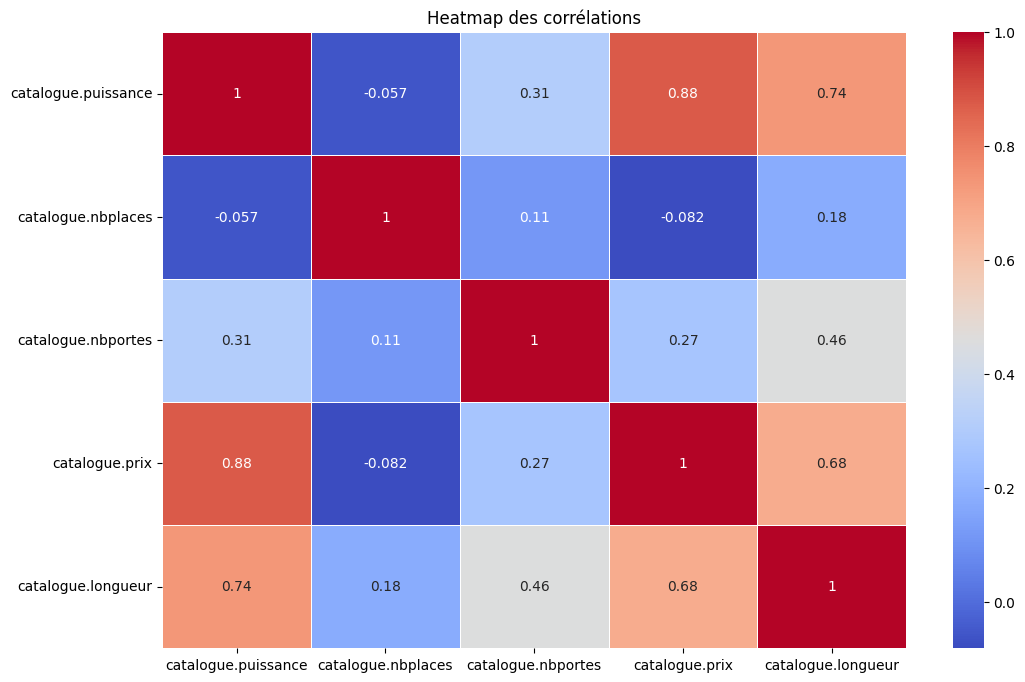

In [19]:
# Exclure les colonnes non numériques spécifiées
df = dfCatalogue.copy()
df['catalogue.longueur'] = df['catalogue.longueur'].map({'très longue': 3, 'longue': 2, 'moyenne': 1, 'courte': 0})

# Calcul de la matrice de corrélation
corr_matrix = df[['catalogue.puissance', 'catalogue.nbplaces', 'catalogue.nbportes', 'catalogue.prix', 'catalogue.longueur']].corr()
print(corr_matrix)

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap des corrélations')
plt.show()


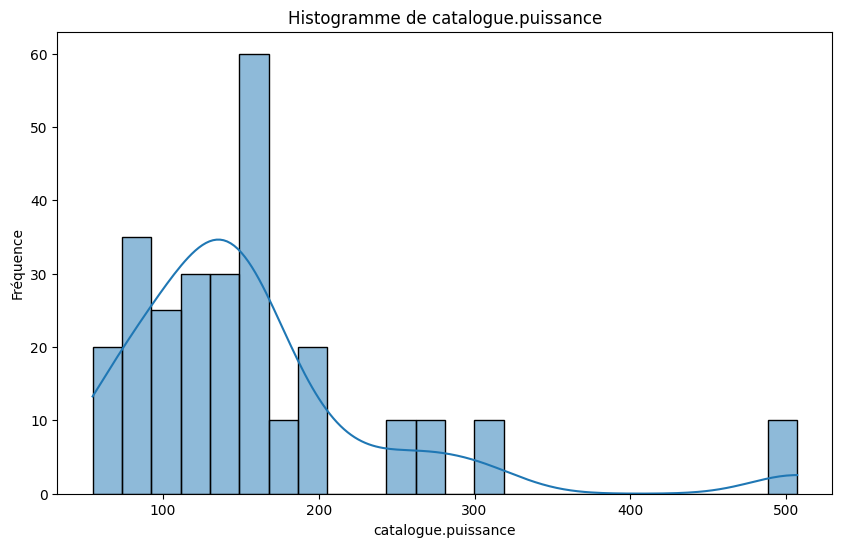

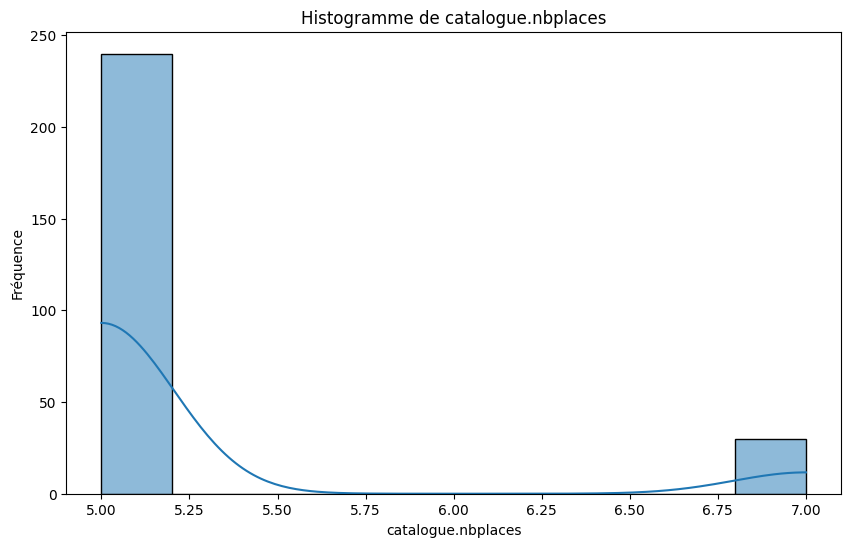

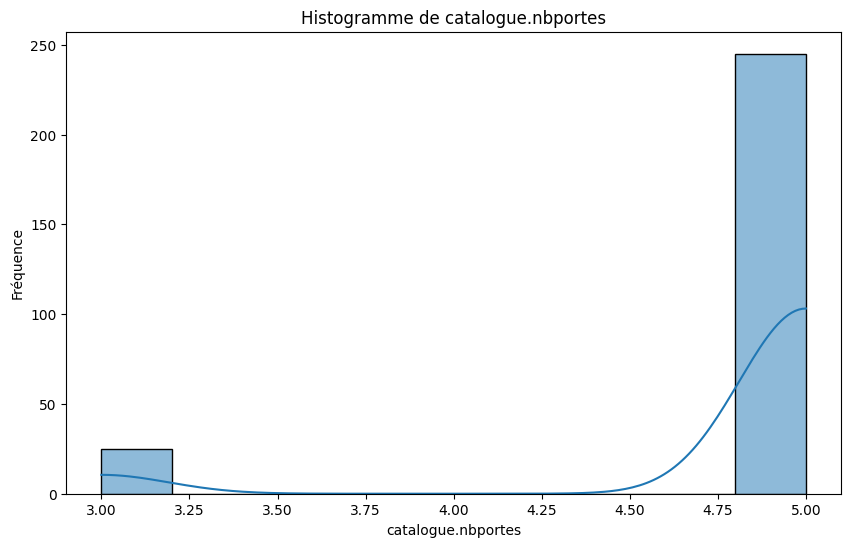

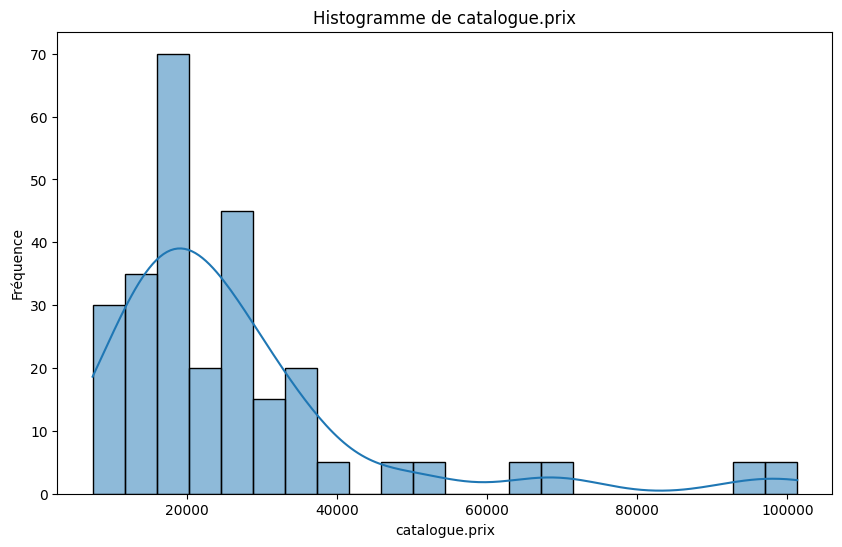

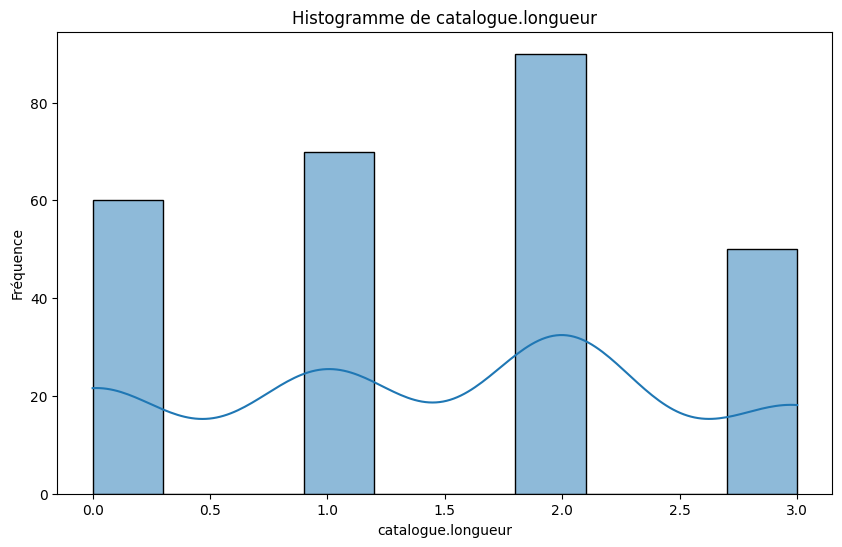

In [20]:
# Affichage des histogrammes pour les colonnes numériques
for col in ['catalogue.puissance', 'catalogue.nbplaces', 'catalogue.nbportes', 'catalogue.prix', 'catalogue.longueur']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()


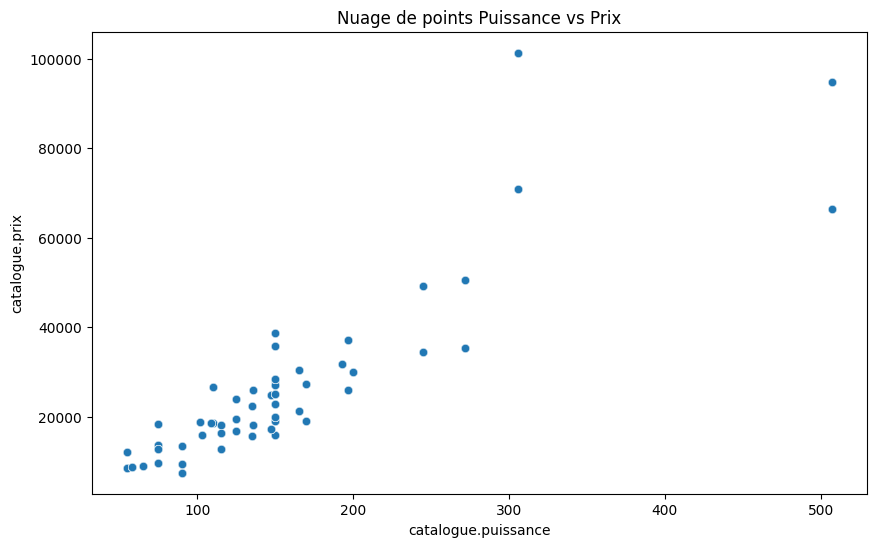

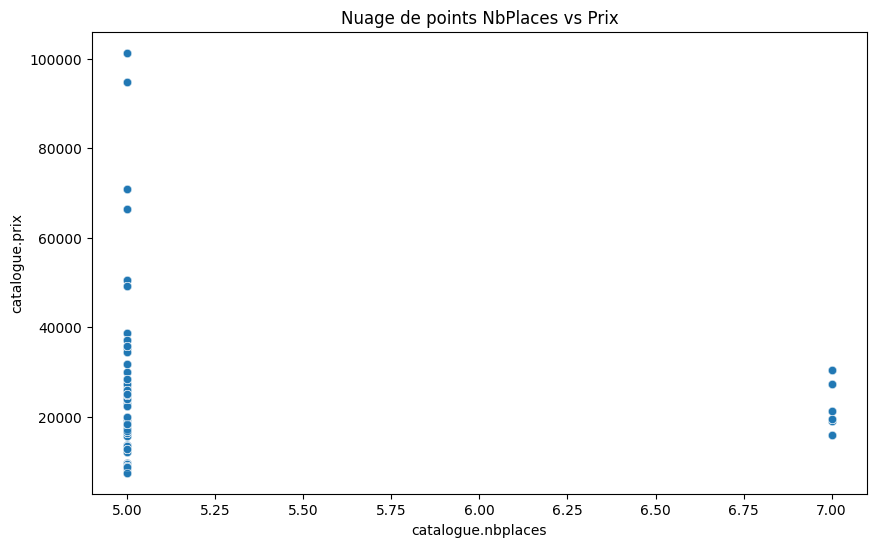

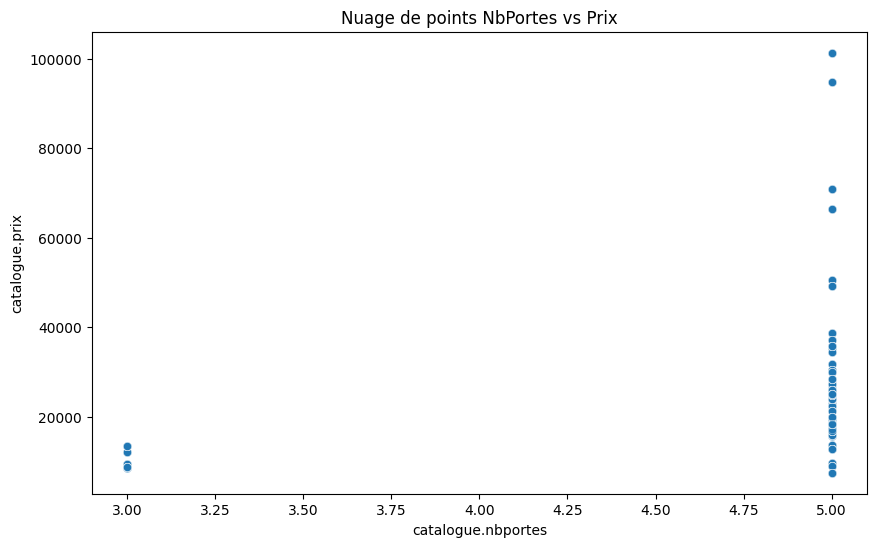

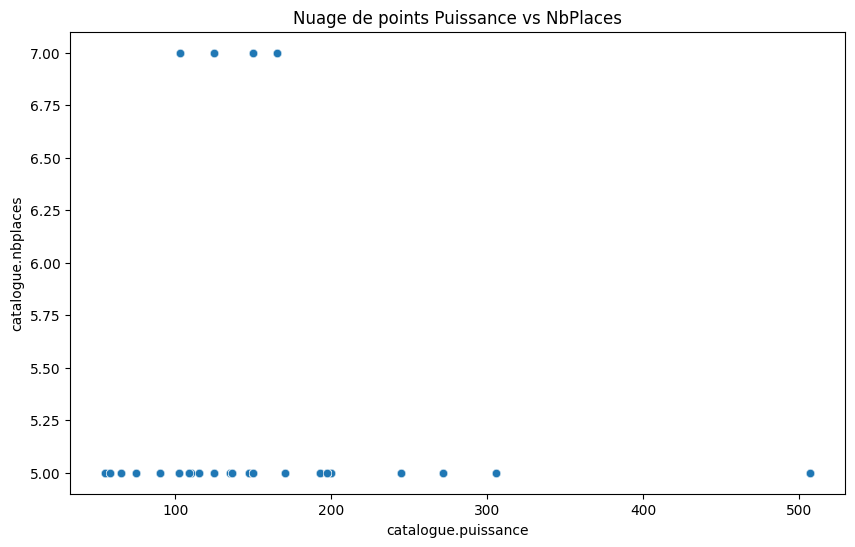

In [22]:
# Nuages de points pour visualiser les relations entre les variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='catalogue.puissance', y='catalogue.prix', data=dfCatalogue, alpha=0.6)
plt.title('Nuage de points Puissance vs Prix')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='catalogue.nbplaces', y='catalogue.prix', data=dfCatalogue, alpha=0.6)
plt.title('Nuage de points NbPlaces vs Prix')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='catalogue.nbportes', y='catalogue.prix', data=dfCatalogue, alpha=0.6)
plt.title('Nuage de points NbPortes vs Prix')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='catalogue.puissance', y='catalogue.nbplaces', data=dfCatalogue, alpha=0.6)
plt.title('Nuage de points Puissance vs NbPlaces')
plt.show()


Conclusion:

a)Variables importantes: La puissance, le prix et la longueur sont des variables importantes car elles montrent de fortes corrélations
                       avec plusieurs autres variables. Elles peuvent être utilisées pour distinguer les catégories de véhicules.
                       Le nombre de places montre peu de corrélations significatives avec les autres variables,mais il ne doit pas être
                       exclu sans une analyse plus approfondie de son impact potentiel sur la catégorisation.
b)Variables moins pertinentes: nbportes semble avoir une distribution homogène et pourrait être moins informative pour le clustering.
c)Variables à considérer pour le Clustering: puissance, nbplaces, prix, longueur.

2/ Categorisation des véhicules

In [25]:
# Sélectionner les caractéristiques pertinentes
dfCatalogue_used = dfCatalogue[['catalogue.puissance', 'catalogue.longueur', 'catalogue.nbplaces', 'catalogue.prix']]
print(dfCatalogue_used.head())

   catalogue.puissance catalogue.longueur  catalogue.nbplaces  catalogue.prix
0                  272        très longue                   5           50500
1                  272        très longue                   5           50500
2                  272        très longue                   5           50500
3                  272        très longue                   5           35350
4                  272        très longue                   5           50500


In [26]:
cols_used=['catalogue.puissance', 'catalogue.longueur', 'catalogue.nbplaces', 'catalogue.prix']
# Attribuer des valeurs numériques spécifiques aux autres variables catégorielles
category_mapping = {
    'très longue': 3,
    'longue': 2,
    'moyenne': 1,
    'courte': 0
}

for col in cols_used:
    if dfCatalogue_used[col].dtype == 'object':
        dfCatalogue_used[col] = dfCatalogue_used[col].map(category_mapping)

print(dfCatalogue_used.head())

   catalogue.puissance  catalogue.longueur  catalogue.nbplaces  catalogue.prix
0                  272                   3                   5           50500
1                  272                   3                   5           50500
2                  272                   3                   5           50500
3                  272                   3                   5           35350
4                  272                   3                   5           50500


/tmp/ipykernel_16201/1339054480.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCatalogue_used[col] = dfCatalogue_used[col].map(category_mapping)


In [27]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
scaled_dfCatalogue_used = scaler.fit_transform(dfCatalogue_used)
print("done")

done


In [28]:
#remettre en dataframe le tableau numpy des données catalogué mise à l'echelle pour vérifier
scaled_dfCatalogue_used_toDf = pd.DataFrame(scaled_dfCatalogue_used, columns=dfCatalogue_used.columns)
print("done")

# Print the first few rows of the scaled DataFrame
print(scaled_dfCatalogue_used_toDf.head())

done
   catalogue.puissance  catalogue.longueur  catalogue.nbplaces  catalogue.prix
0               1.2658            1.471814           -0.353553        1.253336
1               1.2658            1.471814           -0.353553        1.253336
2               1.2658            1.471814           -0.353553        1.253336
3               1.2658            1.471814           -0.353553        0.456589
4               1.2658            1.471814           -0.353553        1.253336


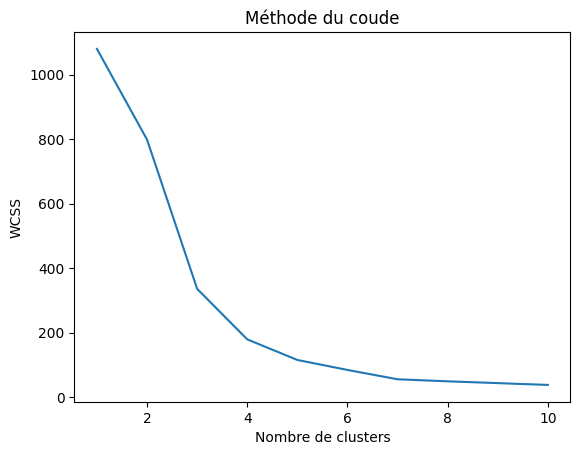

In [30]:
from sklearn.cluster import KMeans

# Utiliser la méthode du coude pour trouver le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_dfCatalogue_used)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()


D'après la methode de coude, on voit ici que le nombre optimale de cluster est aux alentours de 4

In [31]:
# Application de k-means avec le nombre de clusters choisi
kmeans = KMeans(n_clusters=4, random_state=42)
dfCatalogue['catalogue.cluster'] = kmeans.fit_predict(scaled_dfCatalogue_used)
print("done")

done


In [32]:
# Calculer les caractéristiques moyennes de chaque cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_labels = dfCatalogue['catalogue.cluster'].unique()
cluster_summary = pd.DataFrame(cluster_centers, columns=dfCatalogue_used.columns, index=cluster_labels)

print(cluster_summary)

   catalogue.puissance  catalogue.longueur  catalogue.nbplaces  catalogue.prix
2           143.000000            2.000000                 7.0    22263.833333
0           108.076923            0.538462                 5.0    17171.384615
1           178.666667            2.333333                 5.0    29259.222222
3           406.500000            3.000000                 5.0    83342.500000


In [33]:
cluster_labels = {
    0: 'Citadine',
    1: 'Routière',
    2: 'Familiale',
    3: 'Sportive'
}
dfCatalogue['catalogue.categorie'] = dfCatalogue['catalogue.cluster'].map(cluster_labels)

# Afficher le catalogue avec les catégories assignées
print(dfCatalogue)

    catalogue.id catalogue.marque catalogue.nom  catalogue.puissance  \
0              1            Volvo        S80 T6                  272   
1              2            Volvo        S80 T6                  272   
2              3            Volvo        S80 T6                  272   
3              4            Volvo        S80 T6                  272   
4              5            Volvo        S80 T6                  272   
..           ...              ...           ...                  ...   
265          266             Audi        A2 1.4                   75   
266          267             Audi        A2 1.4                   75   
267          268             Audi    A3 2.0 FSI                  150   
268          269             Audi        A2 1.4                   75   
269          270             Audi        A2 1.4                   75   

    catalogue.longueur  catalogue.nbplaces  catalogue.nbportes  \
0          très longue                   5                   5   
1  

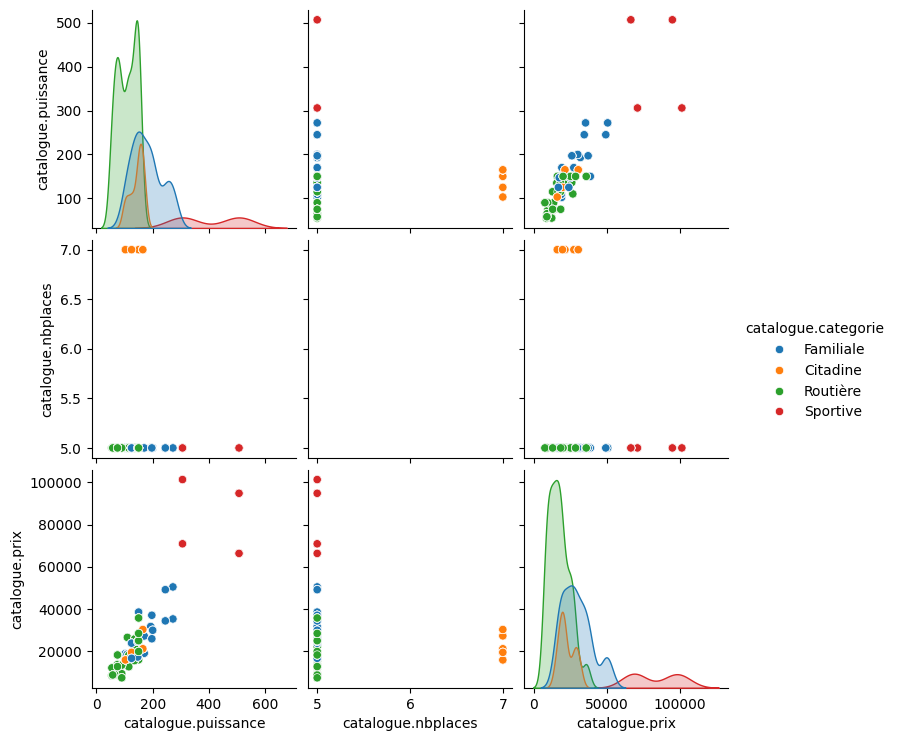

In [34]:
# pour voir la répartition des vehicules dans les groupe de catégorie 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
# sns.pairplot(dfCatalogue, hue='catalogue.categorie', vars=['catalogue.puissance', 'catalogue.longueur', 'catalogue.nbplaces', 'catalogue.prix'])
# plt.show()
# Convert the 'catalogue.longueur' column using one-hot encoding
encoder = OneHotEncoder()
encoded_longueur = encoder.fit_transform(dfCatalogue[['catalogue.longueur']]).toarray()
encoded_df = pd.DataFrame(encoded_longueur, columns=encoder.get_feature_names_out(['catalogue.longueur']))

# Concatenate the one-hot encoded columns with the original DataFrame
dfCatalogue_encoded = pd.concat([dfCatalogue.drop(columns=['catalogue.longueur']), encoded_df], axis=1)

# Create a pairplot with the encoded DataFrame
sns.pairplot(dfCatalogue_encoded, hue='catalogue.categorie', vars=['catalogue.puissance', 'catalogue.nbplaces', 'catalogue.prix'])
plt.show()


In [35]:
print(dfCatalogue.head())

  catalogue.id catalogue.marque catalogue.nom  catalogue.puissance  \
0            1            Volvo        S80 T6                  272   
1            2            Volvo        S80 T6                  272   
2            3            Volvo        S80 T6                  272   
3            4            Volvo        S80 T6                  272   
4            5            Volvo        S80 T6                  272   

  catalogue.longueur  catalogue.nbplaces  catalogue.nbportes  \
0        très longue                   5                   5   
1        très longue                   5                   5   
2        très longue                   5                   5   
3        très longue                   5                   5   
4        très longue                   5                   5   

  catalogue.couleur  catalogue.occasion  catalogue.prix  catalogue.cluster  \
0             blanc               False           50500                  2   
1              noir               Fals

3/ Application des catégories de véhicules définies aux données des Immatriculations

In [36]:
# Sélectionner les caractéristiques pertinentes pour les immatriculations
dfImmatriculation_used = dfImmatriculation[['immatriculation_ext.puissance', 'immatriculation_ext.longueur', 'immatriculation_ext.nbplaces', 'immatriculation_ext.prix']]
cols_used_imma=['immatriculation_ext.puissance', 'immatriculation_ext.longueur', 'immatriculation_ext.nbplaces', 'immatriculation_ext.prix']
# Attribuer des valeurs numériques spécifiques aux autres variables catégorielles
category_mapping_2 = {
    'très longue': 3,
    'longue': 2,
    'moyenne': 1,
    'courte': 0
}
for colo in cols_used_imma:
    if dfImmatriculation_used[colo].dtype == 'object':
        dfImmatriculation_used[colo] = dfImmatriculation_used[colo].map(category_mapping_2)

print(dfImmatriculation_used.head())

   immatriculation_ext.puissance  immatriculation_ext.longueur  \
0                            170                             2   
1                            272                             3   
2                            150                             1   
3                             75                             0   
4                             75                             0   

   immatriculation_ext.nbplaces  immatriculation_ext.prix  
0                             5                     27300  
1                             5                     50500  
2                             5                     16029  
3                             5                      9625  
4                             5                     18310  


/tmp/ipykernel_16201/506209226.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfImmatriculation_used[colo] = dfImmatriculation_used[colo].map(category_mapping_2)


In [37]:
# Normalisation des données
scalerImma = StandardScaler()
scaled_dfImmatriculation_used = scalerImma.fit_transform(dfImmatriculation_used)
print("done scaling")

done scaling


In [39]:
# Utiliser le modèle de clustering pour prédire les clusters des données d'immatriculation
dfImmatriculation['immatriculation_ext.cluster'] = kmeans.predict(scaled_dfImmatriculation_used)

# Mapper les clusters prédits aux catégories de véhicules correspondantes
cluster_labels = {
    0: 'Citadine',
    1: 'Routière',
    2: 'Familiale',
    3: 'Sportive'
}
dfImmatriculation['immatriculation_ext.categorie'] = dfImmatriculation['immatriculation_ext.cluster'].map(cluster_labels)
print("done")

# Afficher le DataFrame d'immatriculation avec les catégories assignées
print(dfImmatriculation.head())


done
  immatriculation_ext.immatriculation immatriculation_ext.marque  \
0                          3176 TS 67                    Renault   
1                          3721 QS 49                      Volvo   
2                          9099 UV 26                 Volkswagen   
3                          3563 LA 55                    Peugeot   
4                          6963 AX 34                       Audi   

  immatriculation_ext.nom  immatriculation_ext.puissance  \
0             Laguna 2.0T                            170   
1                  S80 T6                            272   
2            Golf 2.0 FSI                            150   
3                1007 1.4                             75   
4                  A2 1.4                             75   

  immatriculation_ext.longueur  immatriculation_ext.nbplaces  \
0                       longue                             5   
1                  très longue                             5   
2                      moyenne   

4/ Fusion des données Clients et Immatriculations

In [41]:
# Fusionner les deux DataFrames sur la colonne 'immatriculation'
dfFusionClientImmatricumation = pd.merge(dfClients, dfImmatriculation, how='inner', left_on='clients_ext.immatriculation', right_on='immatriculation_ext.immatriculation')
print("Fusion done")

# Afficher les premières lignes du DataFrame fusionné
print(dfFusionClientImmatricumation.head())


Fusion done
   clients_ext.id  clients_ext.age clients_ext.sexe  clients_ext.taux  \
0               1               36                M              1168   
1               2               77                M               971   
2               3               35                F               458   
3               8               44                F               205   
4              19               32                M               231   

  clients_ext.situationfamiliale  clients_ext.nbenfantsacharge  \
0                    Célibataire                             0   
1                      En Couple                             2   
2                      En Couple                             4   
3                      En Couple                             0   
4                    Célibataire                             0   

   clients_ext.deuxiemevoiture clients_ext.immatriculation  \
0                        False                  3442 PG 87   
1                        Fal